In [1]:
with open('HIVE_C-RVDBv18.0_curated.fasta') as f:
    lines = f.readlines()

In [2]:
print(len(lines))

1542236


In [3]:
line_iterate = [x for x in range(0, len(lines), 2)]

In [4]:
masked = []
masked_genomes = []

masked_completely = 0

for index in line_iterate:
    
    if (index % 100000) == 0:
        print(index)
    
    sequence = lines[index + 1].strip()
    
    sequence_length = len(sequence)
    
    masked_percentage = round((sequence.count('N') / sequence_length)*100, 1)
    
    masked.append(masked_percentage)
    
    if (int(masked_percentage)) == 100:
        masked_completely = masked_completely + 1
        genome_name = lines[index].strip()
        masked_genomes.append(genome_name)
        
print("done!")

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
done!


In [5]:
print(len(masked))

771118


In [6]:
f=open('completely_masked_genomes.txt','w')
for ele in masked_genomes:
    f.write(ele+'\n')

f.close()

# Analysis of genomes masking

In [7]:
from statistics import mean
from statistics import stdev
from statistics import median
from statistics import mode

print("Average contamination per genome: " + str(round(mean(masked), 1)) + "% , standard deviation = " + str(round(stdev(masked), 1)))
print("Median contamination per genome: " + str(round(median(masked), 1)) + "%")
print("Mode contamination per genome: " + str(round(mode(masked), 1)) + "%")

Average contamination per genome: 11.8% , standard deviation = 18.0
Median contamination per genome: 3.9%
Mode contamination per genome: 0.0%


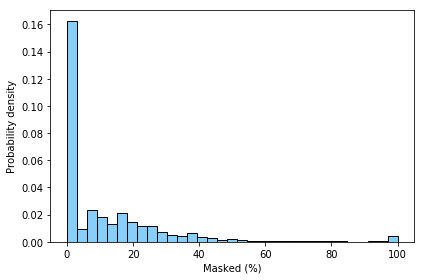

In [9]:
import matplotlib.pyplot as plt

ax = plt.subplot(1, 1, 1)

binwidth = 3

ax.hist(masked, bins = int(100/binwidth),
    color = 'lightskyblue', edgecolor = 'black', density=True)
    
    # Title and labels
ax.set_xlabel('Masked (%)')
ax.set_ylabel('Probability density')

plt.tight_layout()
plt.show()